In [1]:
!pip install jedi

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [2]:
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sk
import sys
import matplotlib.pyplot as plt
from sklearn import svm
from jedi.api.refactoring import inline

from sklearn.datasets import load_iris, make_moons,  make_circles, load_wine
from sklearn.linear_model import LinearRegression, RANSACRegressor, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline, Pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict, train_test_split

from sklearn.svm import SVR
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.decomposition import PCA, KernelPCA

#import graphviz
from sklearn import preprocessing
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier



# Métodos de Reducción de la dimensionalidad
 Hay dos métodos para la reducción de la dimensionalidad:

1. PCA Principal Component Analysis
    * Objetivo es descomponer las variables y obtener un subconjunto de variables más pequeño
    * Convierte los predictores en características no correlacionadas llamadas componentes principales
    * El primer componente explica la mayor varianza posible
    * Cada componente siguiente tiene la varianza más alta que le sigue siendo ortogonal a los componentes anteriores

2. Linear Discriminant Analysis
    * Técnica de reducción dimensional en el pre procesamiento de los datos para técnicas de clasificación y aplicaciones de machine learning
    * La meta es proyectar un dataset de menor dimensión con y con separabilidad de clases para evitar el sobreajuste (overfitting) y reducir el costo computacional.
    * Localiza clusters y clases. Proyecta puntos de datos en una linea





[[-7.06275032e-01 -5.60911546e-01]
 [-5.50810755e-01 -4.63008578e-01]
 [ 2.82811768e-02  8.01332565e-01]
 [-5.33973291e-01  4.45221679e-02]
 [-1.29706786e-01 -3.14604522e-01]
 [-5.86785660e-01 -1.00304672e-01]
 [ 8.35586558e-02 -1.77307670e-01]
 [-2.22196567e-01 -3.70986829e-01]
 [-1.36546749e-01  3.40666414e-02]
 [-1.57943397e+00 -1.94383023e+00]
 [-1.19439569e+00 -1.60791845e+00]
 [ 5.07562007e-01  4.06303013e-02]
 [ 9.68832484e-02 -4.41507920e-01]
 [-8.11677523e-01 -3.55194597e-01]
 [-2.45654801e-01 -6.05201995e-01]
 [ 1.85390092e-01 -5.83973477e-01]
 [-1.03818322e+00  7.34423846e-02]
 [ 4.32018026e-01  1.60020305e-01]
 [-6.04673866e-01 -3.47255098e-01]
 [ 8.85096246e-03 -7.01313307e-01]
 [-9.29534570e-01 -8.55416426e-01]
 [-1.67438227e+00 -9.99313319e-01]
 [-1.97842115e+00 -1.81686241e+00]
 [ 1.86429027e-01  3.03795135e-01]
 [ 2.19586118e-02 -2.84178803e-01]
 [-9.68997765e-01 -7.54894878e-01]
 [ 3.81755720e-01 -5.81468015e-02]
 [-8.85878402e-01  3.61173328e-01]
 [-6.78782621e-02 -4

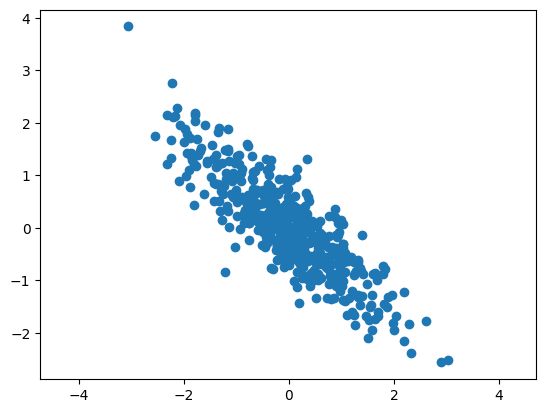

Componentes Principales:  [[-0.74062812  0.67191517]
 [-0.67191517 -0.74062812]]
Explained variance:  [1.62123504 0.12581594]
Explained_variance_ratio:  [0.92798382 0.07201618]


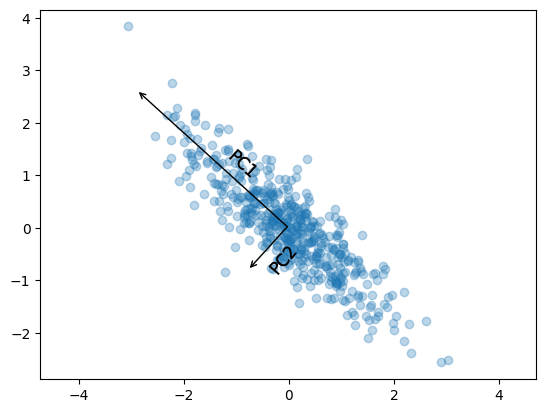

(500, 2)
(500, 1)


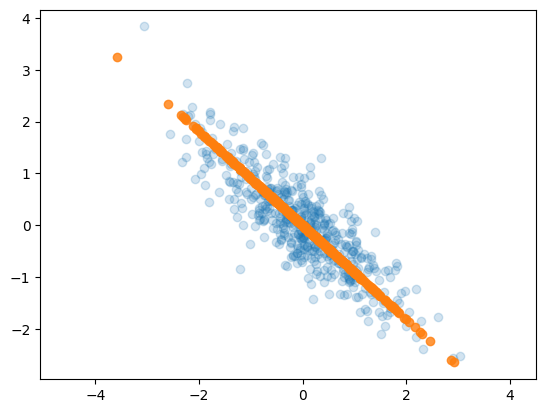

In [3]:






#---------------------------------------- Analisis de Componentes Principales ------------------------------------------
# Explica que variables tienen la mayor varianza pero tiene que ser orthogonal a los componentes anteriores
# Se utiliza en EDA (Analisis de datos Exploratorio)

rnd_num = np.random.RandomState(42)
X = np.dot(rnd_num.rand(2,2), rnd_num.randn(2, 500)).T
print(X)

X[:, 0] = -X[:, 0]
plt.scatter(X[:,0], X[:, 1])
plt.axis('equal')
plt.show()

pca = PCA(n_components=2)
pca.fit(X)

print('Componentes Principales: ', pca.components_)
print('Explained variance: ', pca.explained_variance_)
print('Explained_variance_ratio: ', pca.explained_variance_ratio_)

# Gráfica de Componentes Principales
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)

for k, v in zip(pca.explained_variance_, pca.components_):
    vec = v * 3 * np.sqrt(k)
    ax = plt.gca()
    arrowprops = dict(arrowstyle = '<-', linewidth=1, shrinkA=0, shrinkB=0)
    ax.annotate('', pca.mean_, pca.mean_ + vec, arrowprops=arrowprops)
    ax.text(-0.90, 1.2, 'PC1', ha='center', va='center', rotation=-42, size=12)
    ax.text(-0.1, -0.6, 'PC2', ha='center', va='center', rotation=50, size=12)

plt.axis('equal')
plt.show()


# Reducción de Dimensionalidad con PCA

pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print(X.shape)
print(X_pca.shape)

X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.8)
plt.axis('equal')
plt.show()

#Linea naranja es PCA
#Puntos azules son los datos originales


In [4]:
data = load_wine()
col_name=['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', ''
          'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
          'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

x_col_names=['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', ''
          'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
          'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

# 2° Ejercicio PCA

Componentes Principales:  [[ 0.12753249 -0.25623655 -0.02236181 -0.24428137  0.14757757  0.38490786
   0.41950095 -0.2992598   0.30843734 -0.11907301  0.29949964  0.38381622
   0.27587548]
 [-0.4928047  -0.1904464  -0.31676447  0.03513857 -0.26217161 -0.09601687
  -0.01513129 -0.07626286 -0.0738558  -0.53396728  0.28133315  0.14274046
  -0.381054  ]]
Explained variance:  [4.7001079  2.44718518]
Explained_variance_ratio:  [0.35900066 0.18691934]
                                  0      1
Alcohol                       0.128 -0.493
Malic acid                   -0.256 -0.190
Ash                          -0.022 -0.317
Alcalinity of ash            -0.244  0.035
Magnesium                     0.148 -0.262
Total phenols                 0.385 -0.096
Flavanoids                    0.420 -0.015
Nonflavanoid phenols         -0.299 -0.076
Proanthocyanins               0.308 -0.074
Color intensity              -0.119 -0.534
Hue                           0.299  0.281
OD280/OD315 of diluted wines  0.384

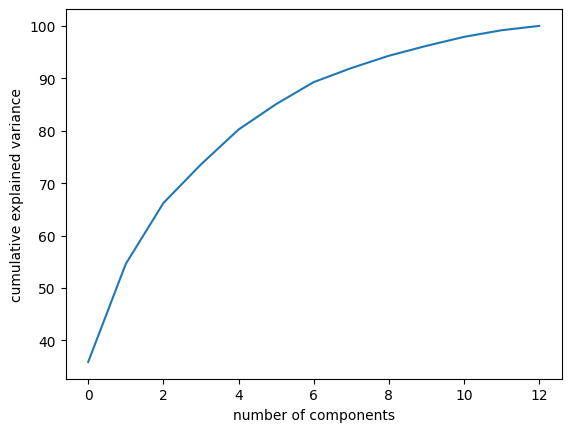

          Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
PCA_0   -1.166027   -3.615327  1.151285           1.167179   0.221634   
PCA_1   -3.862612   -0.482177  1.727584           0.467086  -0.226540   
PCA_2    2.283538    1.275033 -0.131677           1.107830   0.215798   
PCA_3   -1.678507   -2.496962  0.556619           1.131270  -0.003420   
PCA_4    1.572842    0.688203 -1.417945          -0.425082  -0.674013   
...           ...         ...       ...                ...        ...   
PCA_137  1.646677    0.920966  1.955566           0.314591  -0.838742   
PCA_138 -0.248324    2.108473 -0.401127           0.662104  -0.363045   
PCA_139  4.223390   -2.403459 -1.137047           0.905991  -0.673900   
PCA_140 -1.805273    1.490920 -0.089911           0.162752  -1.215320   
PCA_141 -0.078087    1.193279  1.044400           0.319054   0.401311   

         Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
PCA_0         3.062380   -0.553745            

In [5]:
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()

sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

pca = PCA(n_components=2)
pca.fit(X_train_sc)

print('Componentes Principales: ', pca.components_)
print('Explained variance: ', pca.explained_variance_)
print('Explained_variance_ratio: ', pca.explained_variance_ratio_)


table = pd.DataFrame(np.round(pca.components_,3), columns=x_col_names).T

print(table)

pca = PCA(n_components=None)
pca.fit(X_train_sc)
pca.transform(X_train_sc)

print(np.round(pca.explained_variance_ratio_,3))
np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100.)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

res = pca.transform(X_train_sc)
index_name = ['PCA_' + str(k) for k in range(0, len(res))]

df1 = pd.DataFrame(res, columns=x_col_names, index=index_name)
df1.T.sort_values(by='PCA_0')
print(df1)




#Kernel PCA
* Para casos no lineales

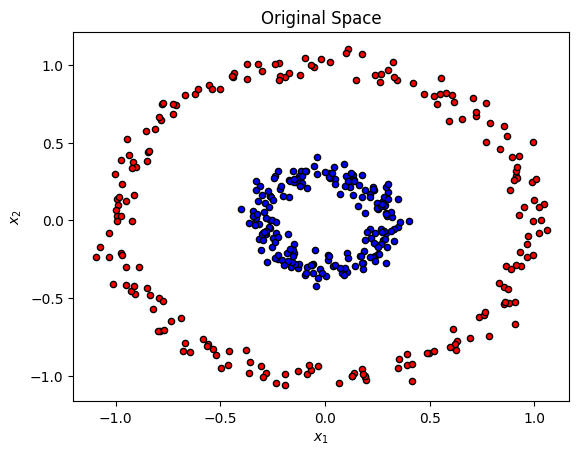

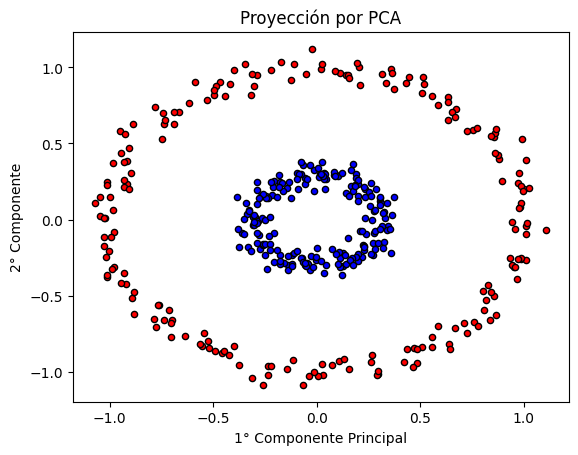

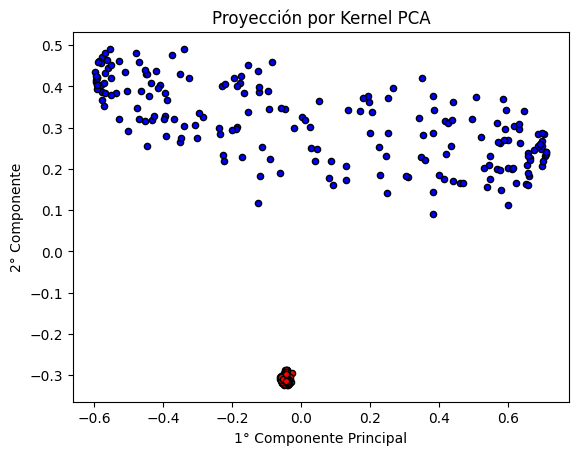

In [7]:

np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)

pca = PCA()
X_pca = pca.fit_transform(X)

#Normal Plot
plt.figure()
plt.title("Original Space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red", s=20, edgecolors='k')
plt.scatter(X[blues, 0], X[blues,1], c='blue', s=20, edgecolors='k')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

#PCA Plot
plt.scatter(X_pca[reds,0], X_pca[reds,1], c="red", s=20, edgecolor='k')
plt.scatter(X_pca[blues,0], X_pca[blues,1], c="blue", s=20, edgecolor='k')
plt.title('Proyección por PCA')
plt.xlabel('1° Componente Principal')
plt.ylabel('2° Componente')
plt.show()

#KPCA Plot
plt.scatter(X_kpca[reds,0], X_kpca[reds,1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues,0], X_kpca[blues,1], c="blue", s=20, edgecolor='k')
plt.title('Proyección por Kernel PCA')
plt.xlabel('1° Componente Principal')
plt.ylabel('2° Componente')
plt.show()



#Kernel PCA Demo

Ejercicio Kernel PCA demo


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


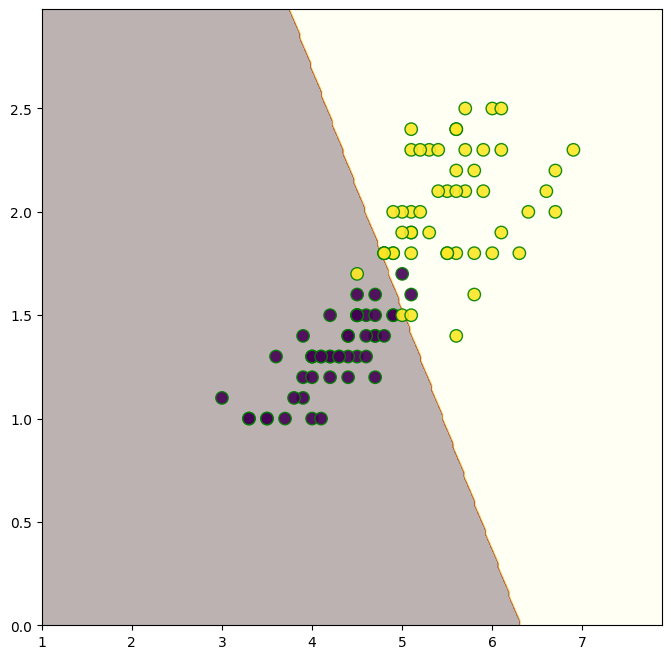

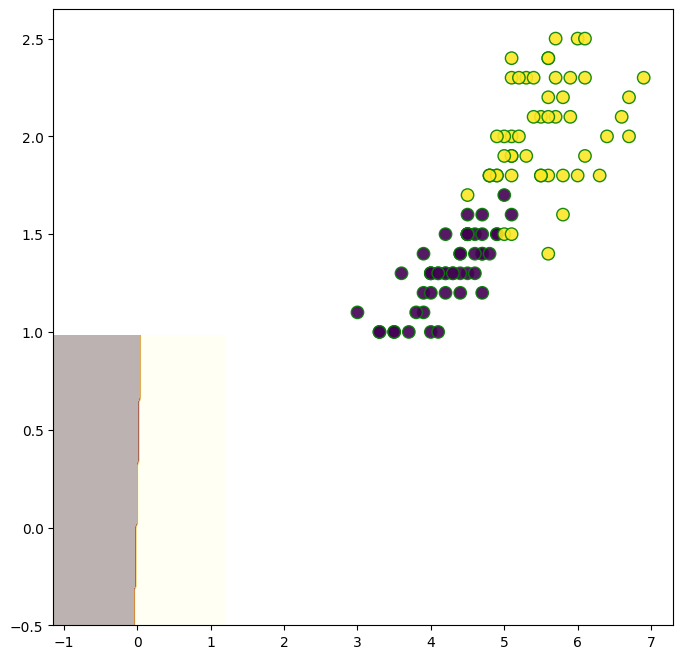

In [8]:
print('Ejercicio Kernel PCA demo')

df = sns.load_dataset('iris')
df = df[df['species'] != 'setosa']
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'versicolor': 0, 'virginica': 1}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

kpca = KernelPCA(kernel='rbf', n_components=2)
X_kpca = kpca.fit_transform(X)

clf = LogisticRegression(solver='lbfgs')
clf.fit(X,y)

Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  #meshgrid devuelve lista de matrices de coordenadas a partir de vectores de coordenadas x y y

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,8))
ax = plt.contourf(xx, yy, z, cmap= 'afmhot', alpha=0.3)
plt.scatter(X.values[:,0], X.values[:,1], c=y, s=80, alpha=0.9, edgecolors='g')
plt.show()

#---- Estimación regresión logística con dataset de kernel PCA
clf.fit(X_kpca, y)
Xv = X_kpca
h = 0.02
x_min, x_max = Xv.min() -0.5, Xv.max() + 0.5
y_min, y_max = y.min() -0.5, y.max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,8))
ax = plt.contourf(xx, yy, z, cmap= 'afmhot', alpha=0.3)
plt.scatter(X.values[:,0], X.values[:,1], c=y, s=80, alpha=0.9, edgecolors='g')
plt.show()